In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
ted = pd.read_csv('ted_main.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


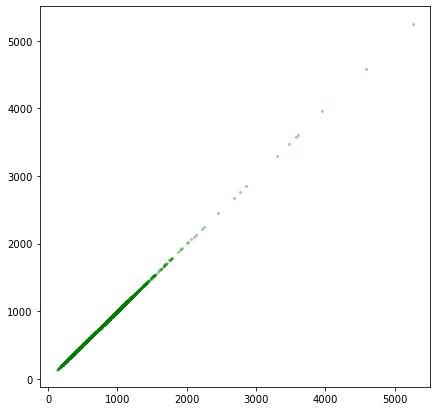

In [3]:
ted_duration = ted.duration
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(ted_duration,ted_duration,
        marker='o', color='green', s=4, alpha=0.3)

In [ ]:
def gaussian_kernel(x):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp((-0.5) * (x**2))


def parzen_window_func(x_vect, h ,x):
    parzen = []
    for x_i in x:
        k_n =0
        for j in range(len(x_vect)):
            k_n = k_n + gaussian_kernel((x_i-x_vect[j])/h)
        parzen.append(k_n/(len(x_vect)*h))
    return parzen


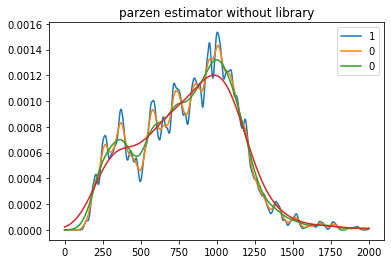

In [9]:

h = [10, 20, 50, 100]
count = np.arange(2000)
for i in h:
    estimation = parzen_window_func(ted_duration, i, count)
    plt.legend('{}'.format(i))
    plt.plot(x, estimation)
plt.title("parzen estimator without library")
plt.show()

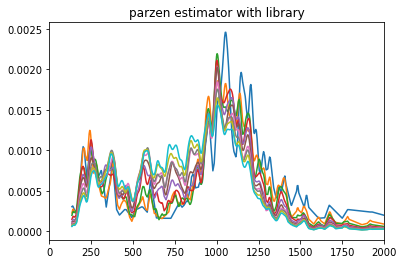

In [10]:
h = [10, 20, 50, 100]
for i in range(250, len(ted_duration), 250):
    Window = KernelDensity(kernel = "gaussian", bandwidth = 10)
    Window.fit(ted_duration.reshape(-1, 1))
    plt.plot(ted_duration, np.exp(Window.score_samples(ted_duration.reshape(-1, 1))))
plt.title("parzen estimator with library")
plt.show()